# Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region medical insurance is calculated . Columns
• age: age of primary beneficiary • sex: insurance contractor gender, female, male • bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9. • children: Number of children covered by health insurance / Number of dependents • smoker: Smoking • region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest. • charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer

import scipy
from imblearn.over_sampling import SMOTE

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# EDA

# Get general information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

we can check here all the datas whether matches their datatypes or not

In [7]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [8]:
#checking null values or missing data
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

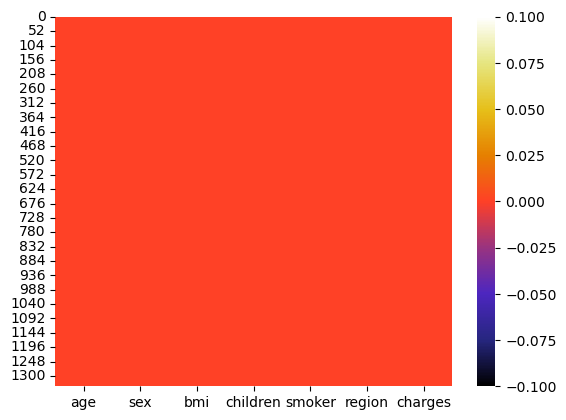

In [9]:
sns.heatmap(df.isnull(), cmap='CMRmap')

In [10]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

          Missing Values  % Missing data
age                    0             0.0
sex                    0             0.0
bmi                    0             0.0
children               0             0.0
smoker                 0             0.0
region                 0             0.0
charges                0             0.0


#hence there is no missing value

In [11]:
# Count the number of unique values in each column
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [12]:
#now we seperate the data columns 

categorial_data = []
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        categorial_data.append(i) 
print("Categorial Columns:", categorial_data)
print("\n")

numerical_data=[]
for i in df.dtypes.index:
    if df.dtypes[i] != "object":
        numerical_data.append(i)
print("Numerical data:",numerical_data)
print("\n")

Categorial Columns: ['sex', 'smoker', 'region']


Numerical data: ['age', 'bmi', 'children', 'charges']




In [13]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


From above we see that there are three categorical columns, so we will use transform then into numerical datatype

# Data Preprocessing

In [14]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


In [15]:
df.replace({'smoker':{'no':0,'yes':1}},inplace=True)

In [16]:
df.replace({'region':{'northwest':0, 'northeast':1,'southeast':2,'southwest':3}},inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


In [17]:
#we have coverted all the object datatypes into int

In [18]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [19]:
#checking unique value counts of each column

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


0    676
1    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


0    1064
1     274
Name: smoker, dtype: int64


2    364
3    325
0    325
1    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.3

Now checking for categorical columns using univariate graphs

AxesSubplot(0.125,0.11;0.775x0.77)


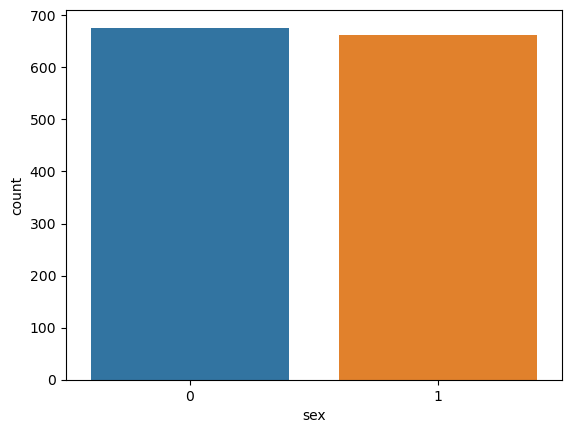

In [20]:
print(sns.countplot(x=df['sex']))

AxesSubplot(0.125,0.11;0.775x0.77)


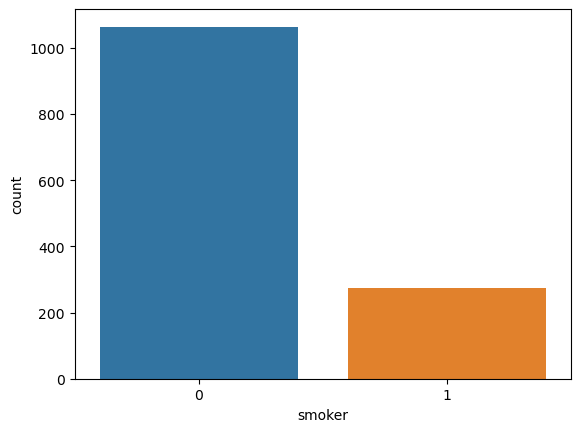

In [21]:
print(sns.countplot(x=df['smoker']))

<AxesSubplot:xlabel='region', ylabel='count'>

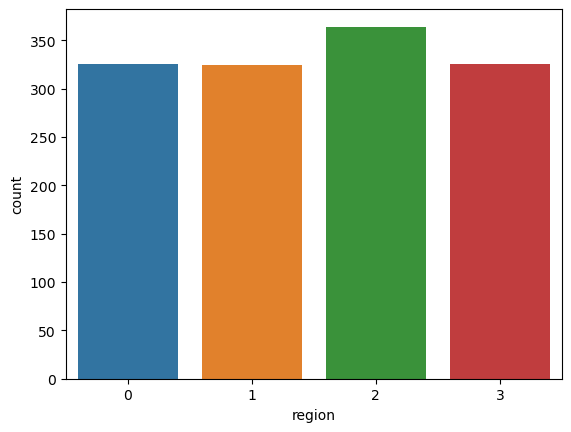

In [22]:
sns.countplot(x=df['region'])

In [23]:
df.skew()

age         0.055673
sex         0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.037853
charges     1.515880
dtype: float64

By the above data we can see that,
smoker ans charges are having == highly skewed data
sex and age has ==less skewness 
and region has negative skewness

In [24]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


it describes

#no negative value
#no missing value

#except region column data, all other column datas mean value is GREATER THAN median. so its represent datas are having right skewness.


#there are some huge different between 75% and max . hence there are outliers present

# now we check distribution plot. this class is basically used for the distribution, to check the distribution of the data.
this is also part of univariate analysis.

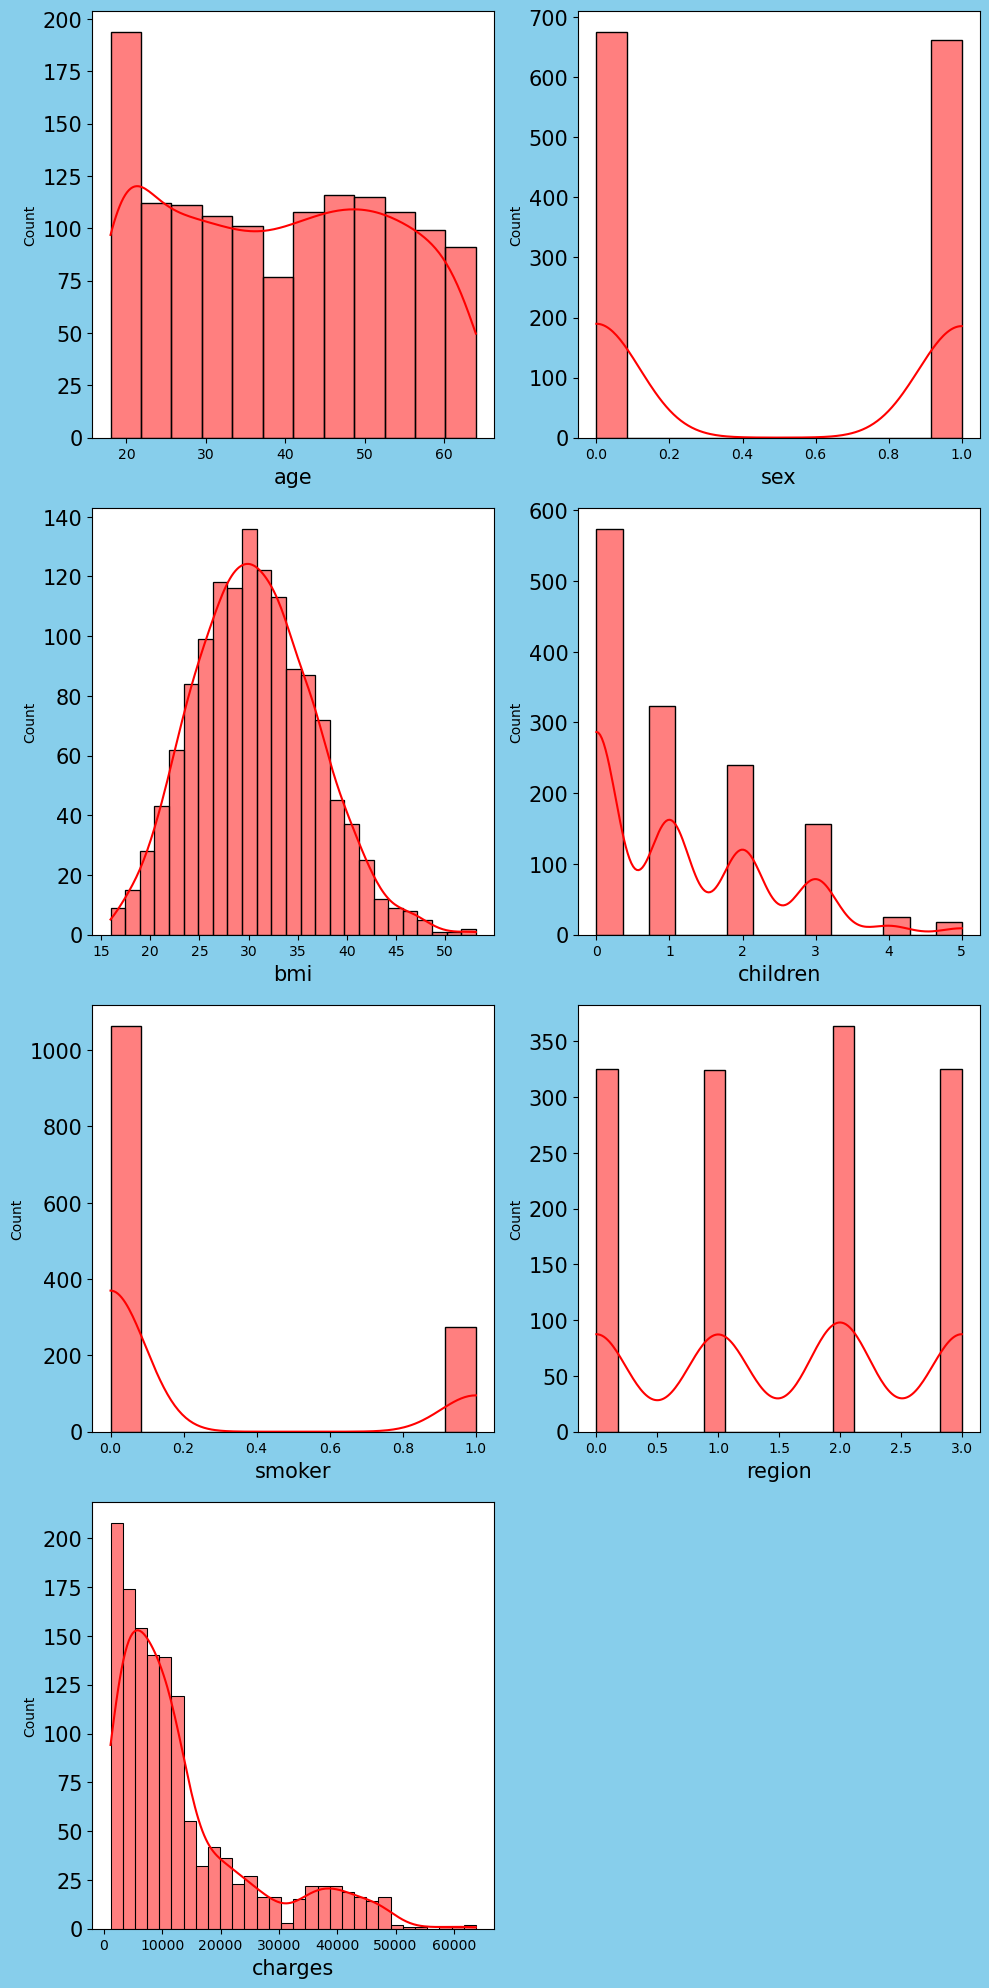

In [25]:
#lets check how the data has been distributed in remaining column

plt.figure(figsize = (10,20), facecolor = "skyblue")
plotnumber = 1
for col in df.columns:
    if plotnumber <=7:
        ax=plt.subplot(4,2, plotnumber)
        sns.histplot(df[col],color="red", kde=True)
        plt.xlabel(col,fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 15)
    plotnumber +=1
plt.tight_layout()

From above we can see that skewness is present in only smoker and children data but we wont be removing skewness from them as it is considered as categorical data

In [26]:
dfc=df.corr()
dfc

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.003243,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.007974,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.156686,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.001907,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.013246,0.787251
region,0.003243,-0.007974,0.156686,-0.001907,0.013246,1.000000,0.011741
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.011741,1.000000


<AxesSubplot:>

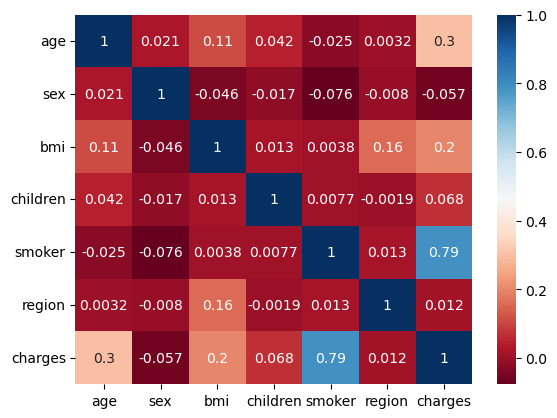

In [27]:
sns.heatmap(dfc,cmap='RdBu',annot=True)

From above we can see that being a smoker , age, and bmi all have high correlation with the charges as compared to other variables

Now checking for correlation using graphs (Data visualization)

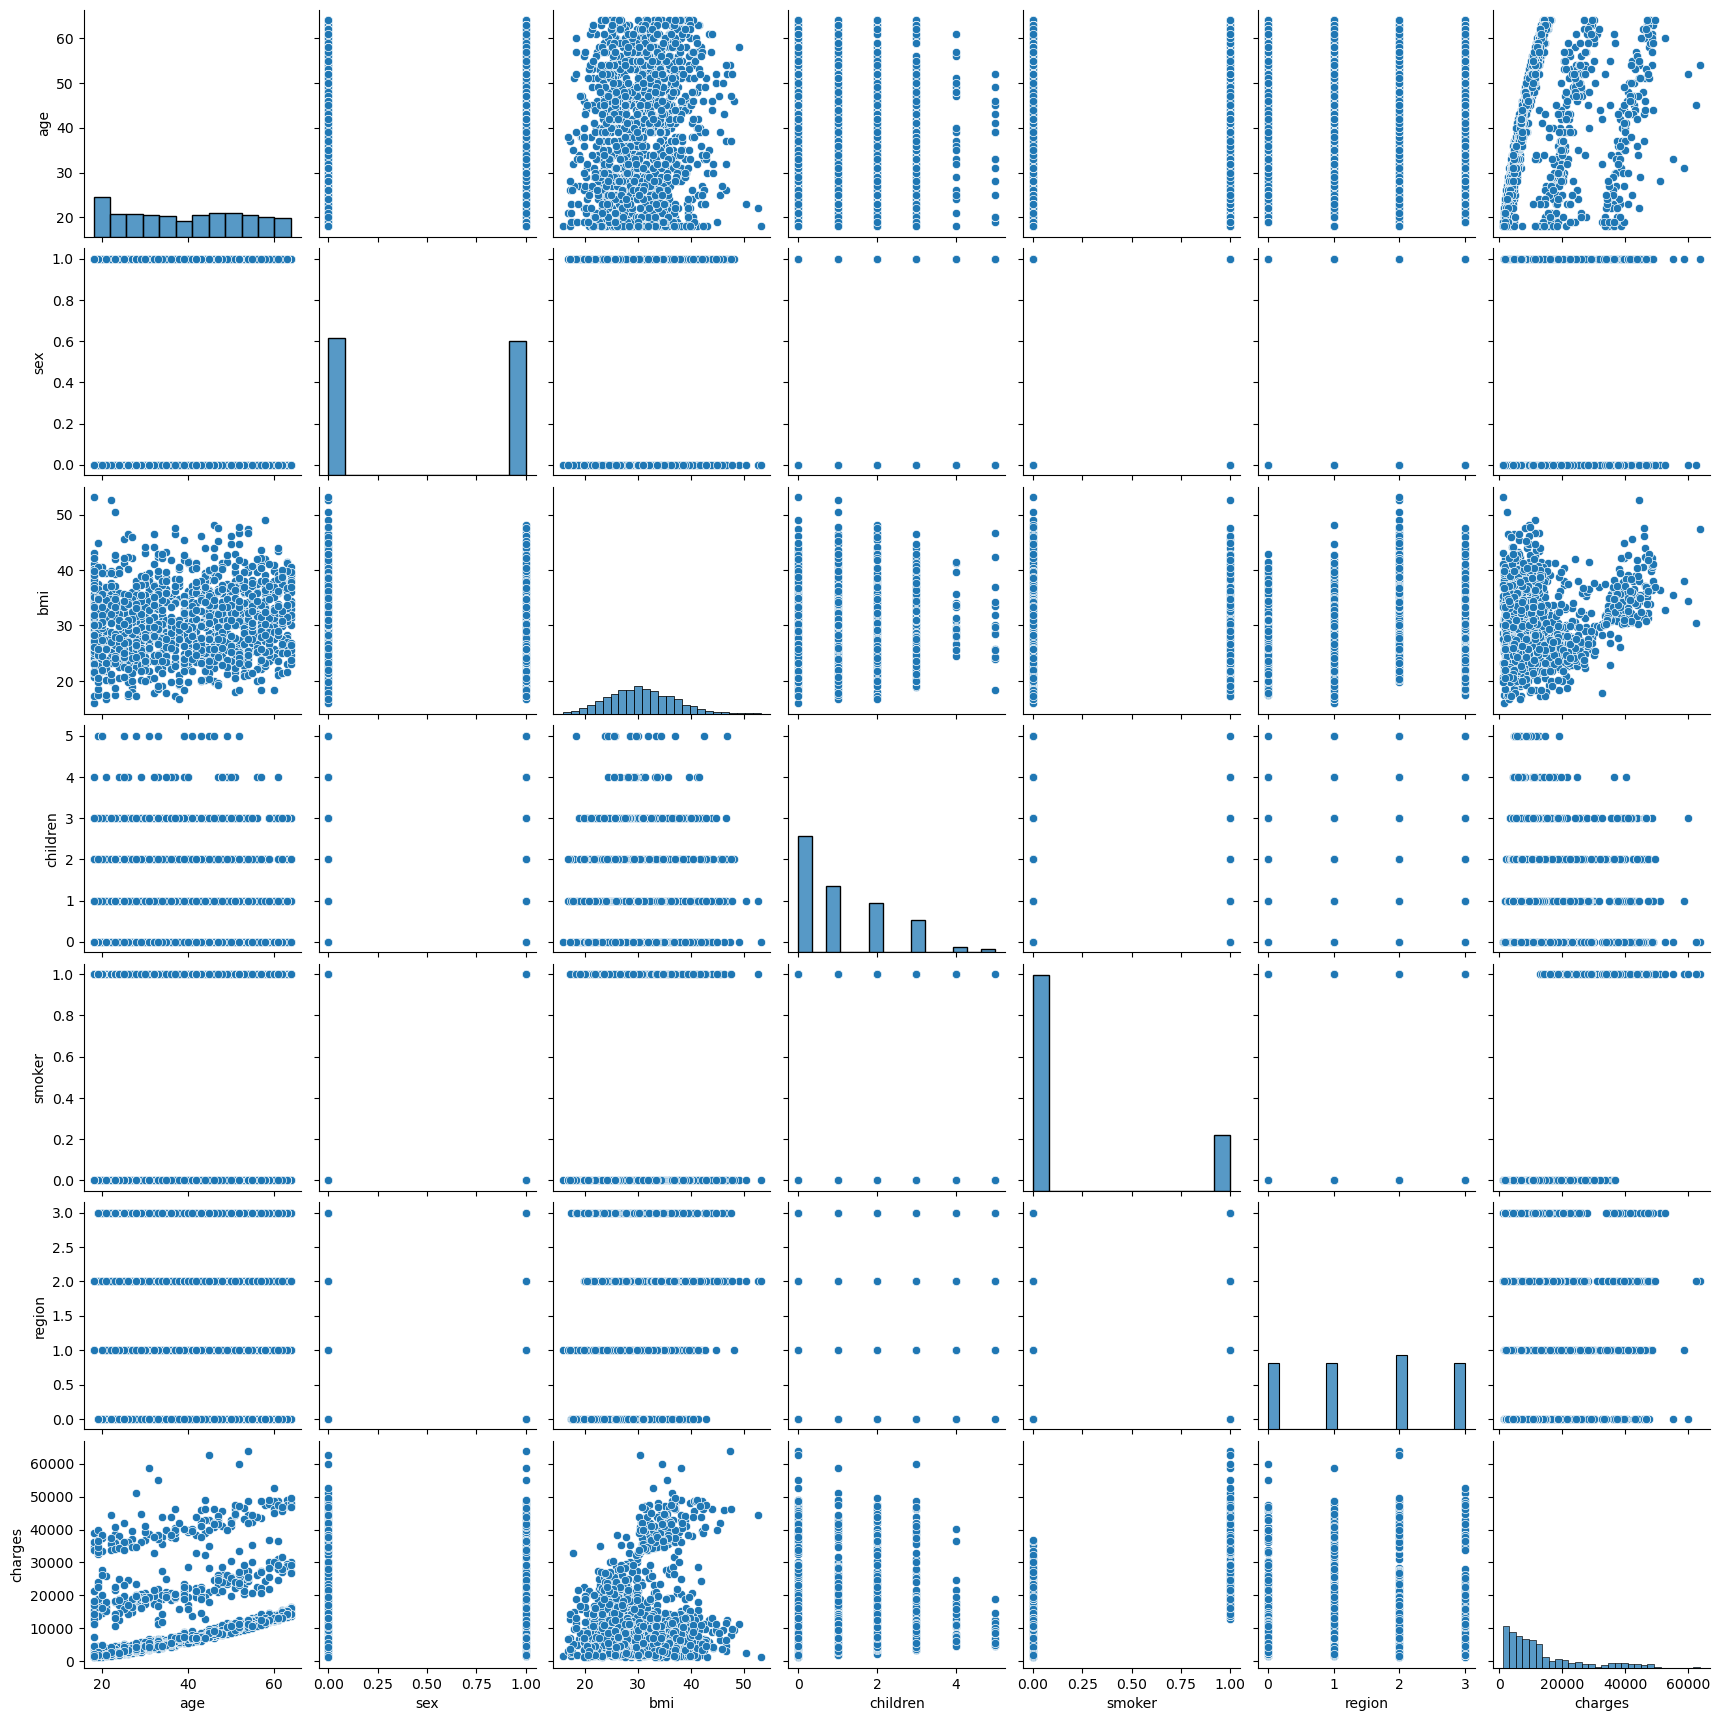

In [28]:
sns.pairplot(data=df)

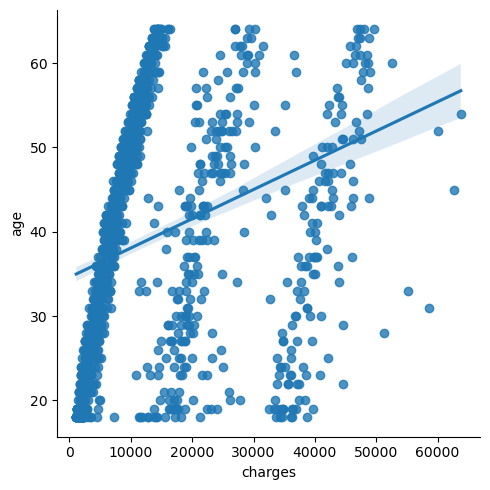

In [29]:
sns.lmplot(x="charges", y="age" , data=df)

from above observation we se that there is a positive relation between charges and age of a person

<AxesSubplot:title={'center':'bmi & Charge'}, xlabel='bmi', ylabel='charges'>

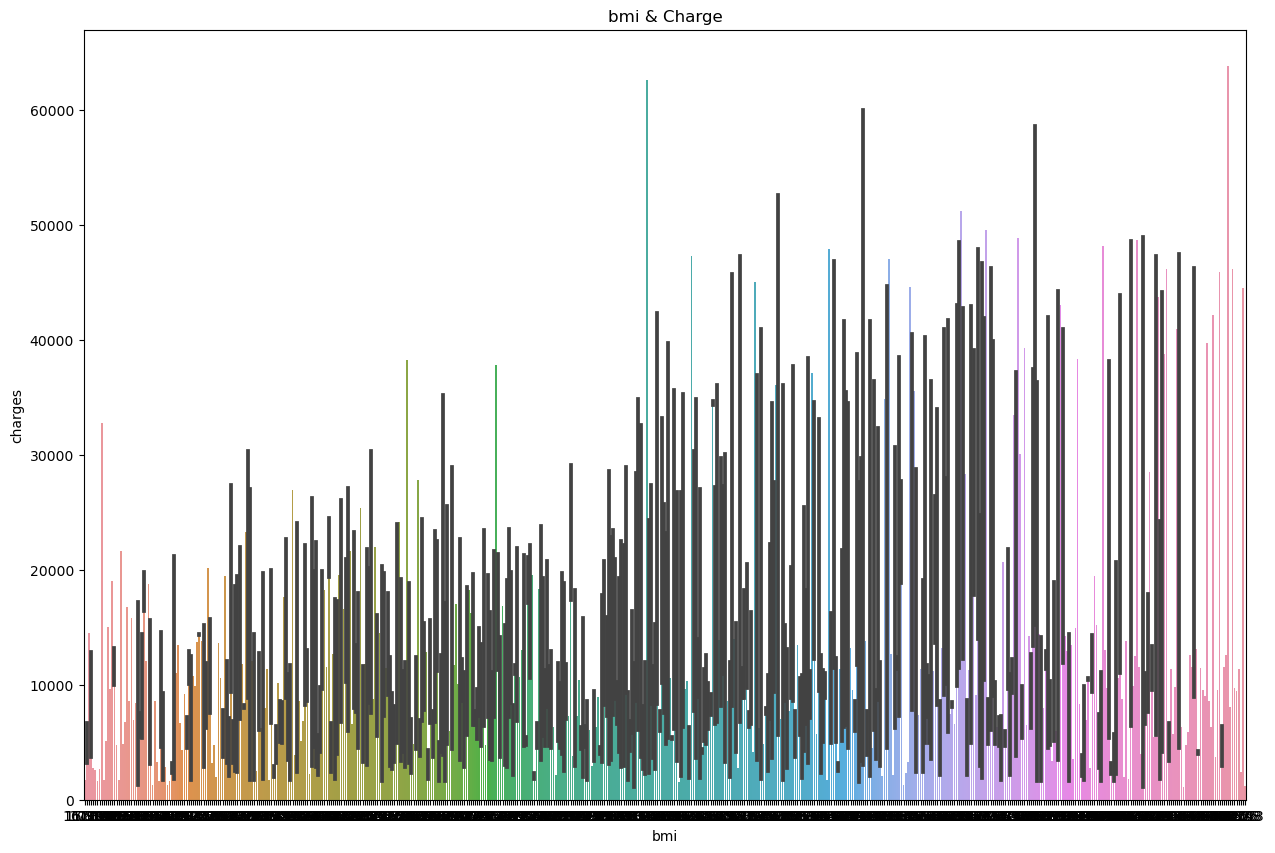

In [30]:
plt.figure(figsize=(15,10))
plt.title('bmi & Charge')
sns.barplot(x='bmi',y='charges',data=df)

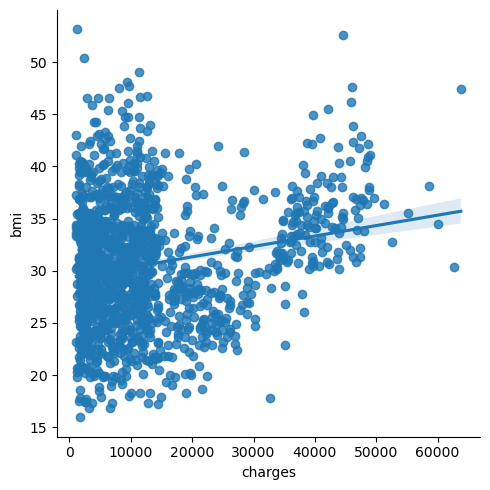

In [31]:
sns.lmplot(x="charges", y="bmi" , data=df)

We can see that as BMI increases charges also increases hence a positive relation is there

<AxesSubplot:title={'center':'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

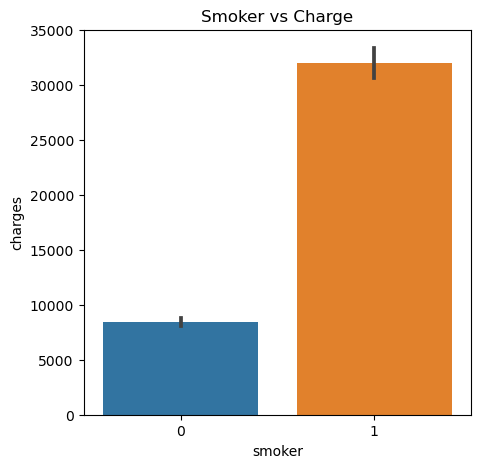

In [32]:
plt.figure(figsize=(5,5))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=df)

We can see that being a smoker leads to more insurance charges

<AxesSubplot:title={'center':'Sex vs Charge'}, xlabel='sex', ylabel='charges'>

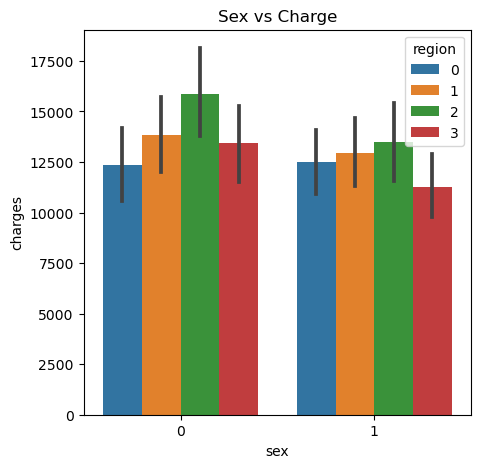

In [33]:
plt.figure(figsize=(5,5))
plt.title('Sex vs Charge')
sns.barplot(x='sex',y='charges',hue='region',data=df)

From above we can see that neither region nor sex has major influence on insurance charges

# Now we will seperate the independent and dependent variable for linear regression

In [34]:
x=df.drop(columns='charges',axis=1)
y=df['charges']

In [35]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,3
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,0
4,32,0,28.880,0,0,0
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0
1334,18,1,31.920,0,0,1
1335,18,1,36.850,0,0,2
1336,21,1,25.800,0,0,3


In [36]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# checking the outliers

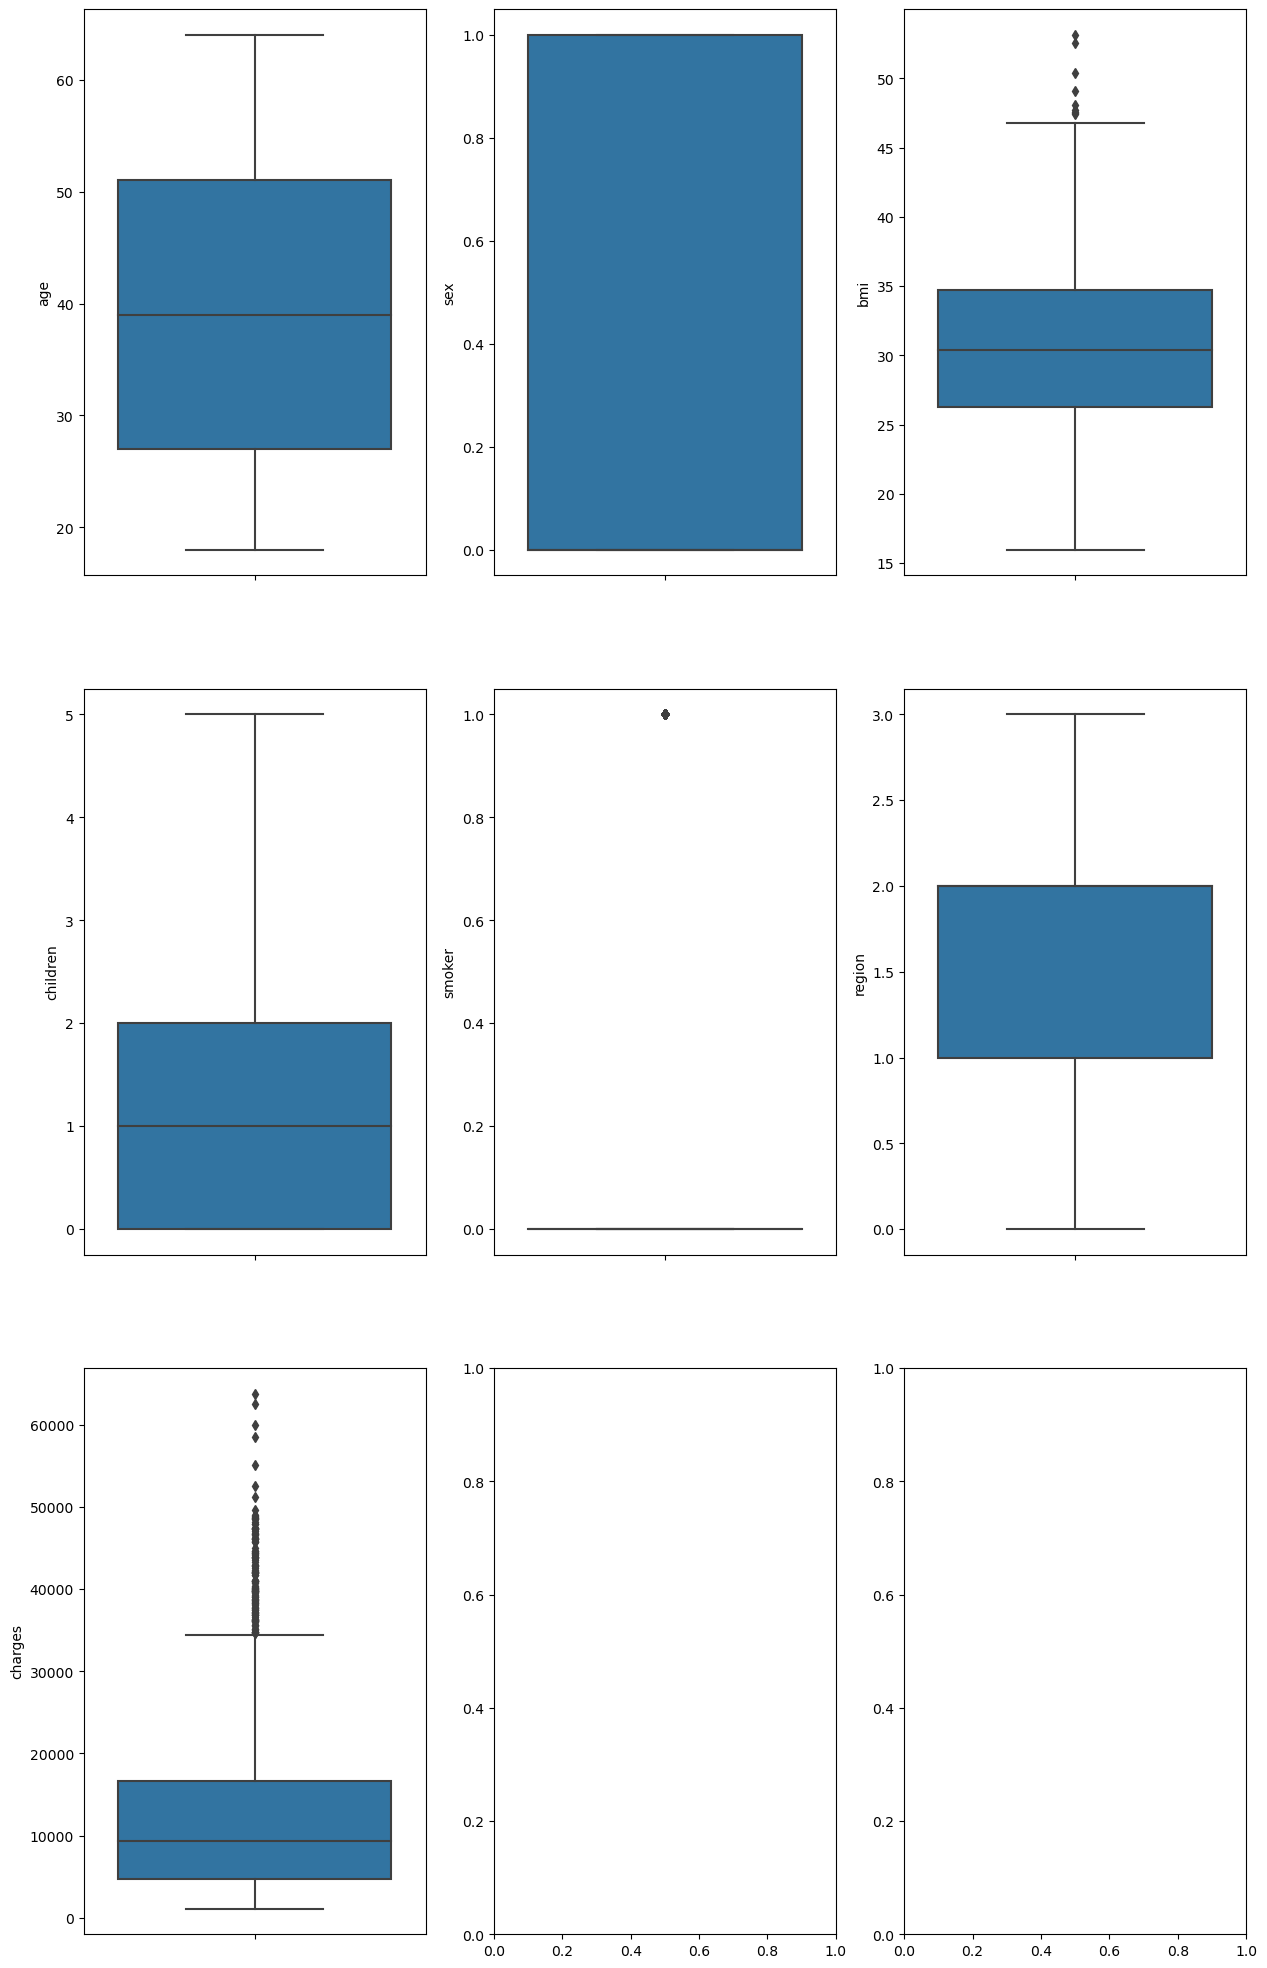

In [37]:
fig,ax = plt.subplots(3,3,figsize=(15,25))
row = col = 0
for n,i in enumerate(df.columns):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    sns.boxplot(y=df[i],ax=ax[row,col])
    col += 1
plt.show()

In [38]:
# lets remove outliers from tha data using Z-scorem

In [39]:
from scipy.stats import zscore

In [40]:
z=np.abs(zscore(df))
df1 = df[(z<3).all(axis=1)]
df1

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


#As we can see that data loss after removing the outlier is approx 10% so we dont remove the outliers.
#Instead of removing the outliers we remove the skewness from the data

In [41]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

df2 = pt.fit_transform(df.iloc[:,:-1])
df2 =pd.DataFrame(df2, columns = df.iloc[:,:-1].columns)
df2.head()

,age,sex,bmi,children,smoker,region
0,-1.524529,1.010519,-0.409919,-1.074893,1.970587,1.287733
1,-1.616539,-0.989591,0.548954,0.300468,-0.507463,0.482593
2,-0.762870,-0.989591,0.428603,1.367452,-0.507463,0.482593
3,-0.379118,-0.989591,-1.353878,-1.074893,-0.507463,-1.427004
4,-0.454058,-0.989591,-0.242750,-1.074893,-0.507463,-1.427004


In [42]:
df2.skew()

age        -0.100193
sex         0.020951
bmi        -0.006617
children    0.105254
smoker      1.464766
region     -0.172552
dtype: float64

all the skewness has been removed

In [43]:
features = df2.columns.tolist()
features

['age', 'sex', 'bmi', 'children', 'smoker', 'region']

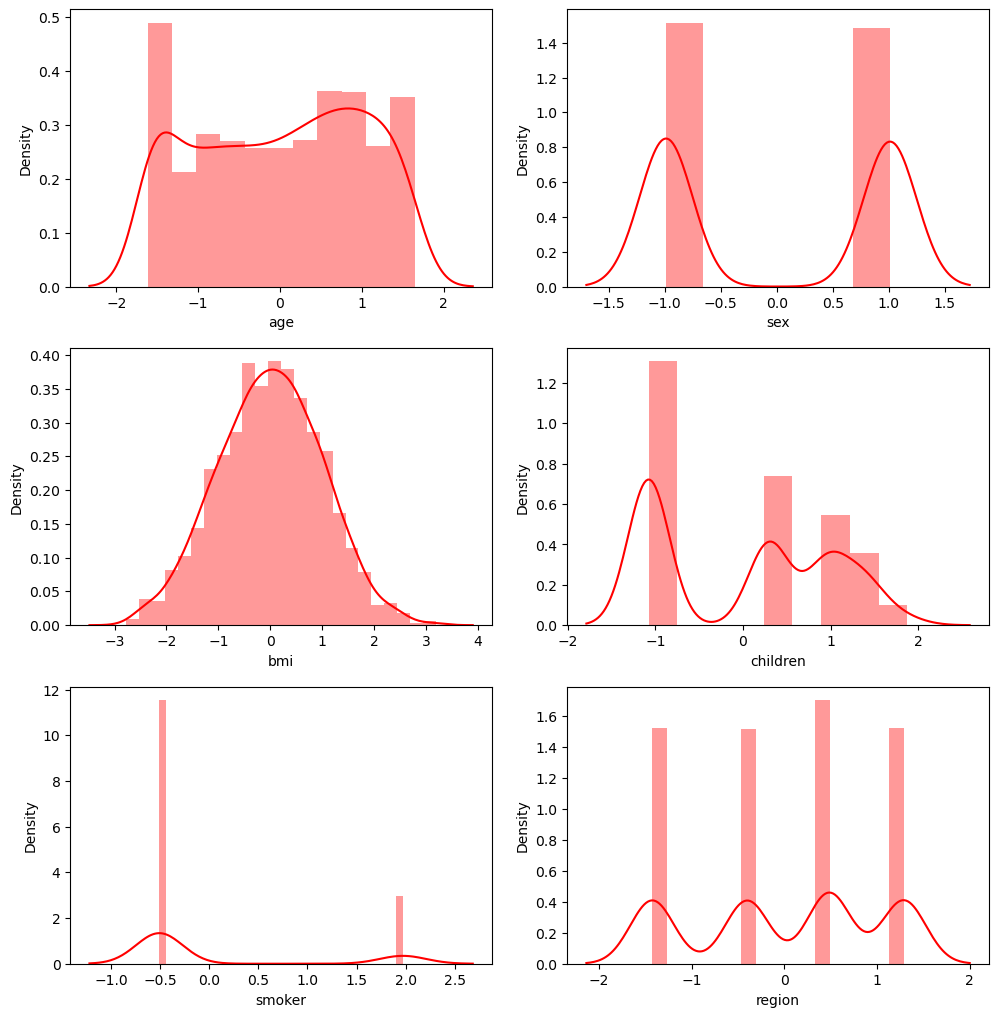

In [44]:
plt.figure(figsize = (10,20), facecolor = "white")
plotnumber = 1
for col in features:
    if plotnumber <=12:
        ax=plt.subplot(6,2, plotnumber)
        sns.distplot(df2[col],color="r")
        plt.xlabel(col,fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber +=1
plt.tight_layout()

Training the model

In [45]:
#train test split the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [46]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [47]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [48]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [49]:
testing_data_prediction = model.predict(x_test)

In [50]:
from sklearn import metrics
score = metrics.r2_score(y_test,testing_data_prediction)

In [51]:
score

0.8418084143404108

In [52]:
#BULDING THE PREDICTION SYSTEM
input_data = (19,0,27.9,0,1,3)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print('Predicted Medical Insurance Cost : ',str(prediction))

Predicted Medical Insurance Cost :  [17583.6907514]


Saving the trained model

In [56]:
import joblib

filename = 'medical_insurance_cost_predictor.pkl'
joblib.dump(model, filename)

['medical_insurance_cost_predictor.pkl']